In [2]:
import sys
print(sys.executable) # Permet de vérifier que mon environnement est bien utilisé dans ce notebook

/home/turpinli/micromamba/stageM2_micro/bin/python


In [3]:
!which pip

/home/turpinli/micromamba/stageM2_micro/bin/pip


In [4]:
from datetime import datetime, timedelta

import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import os 
os.listdir("/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work")

import matplotlib.colors as mcolors # Import les palettes de couleurs
import cartopy.crs as ccrs # Permet d'utiliser des projections de cartes
import cartopy.feature as cfeature # Permet d'ajouter d'autres éléments à la carte


In [5]:
#xr.backends.list_engines() # Permet de vérifier si netcdf4 est bien installé et reconnu

In [6]:
# Ouverture du fichier ntcdf via xarray DAILY
data = xr.open_dataset('/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/daily/SMB_daysum_MARv3.14_ER5_spin2_GRq_2000.nc') # Ouvre avec un xarray le fichier netCDF qui contient les sorties de MAR
#data
#data[['TIME', 'X', 'Y', 'SMB']].to_dataframe()

In [7]:
# Ouverture du fichier ntcdf via xarray MONTHLY
#data = xr.open_dataset('/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/monthly/TTZ_monmean_MARv3.14_ER5_spin2_GRq_2021.nc') # Ouvre avec un xarray le fichier netCDF qui contient les sorties de MAR
#data
#data[['TIME', 'X', 'Y', 'ZTQLEV']].to_dataframe()

In [8]:
data.SMB.shape # Forme que prends les informations de SMB
#data.SMB.sel(TIME="2000-01-01T12:00:00.000000000")
data.SMB.isel(TIME=164,SECTOR=1,Y=10,X=20)
float(data.SMB.sel(TIME="2000-06-13",SECTOR=1,Y=data.Y[60],X=data.X[20], method="nearest"))
#print(data.SMB)

0.0

In [9]:
k = 15 # Pixels à retirer aux bords du domaine (éviter effet de bord)

In [10]:
# MAR topography (pas la même correction que Xavier appliqué, car non nécessaire ici)

sourceDataGrid='/home/amoryc/'## Plot de la Temperature de surface de la grille correspondant au glacier Mera
fileName_grM='NST.2000.01.01.00.GRq.nc'

ds_grM= xr.open_dataset(sourceDataGrid+fileName_grM) # ds pour DataSet
#print(ds_grM)

ds_lon = ds_grM.LON[k:-k, k:-k]   # Longitude
ds_lat = ds_grM.LAT[k:-k, k:-k]   # Latitude
ds_SH  = ds_grM.SH[k:-k, k:-k]    # Surface Height (topographie en m)
ds_ICE = ds_grM.ICE[k:-k, k:-k]   # Pourcentage de glace par maille

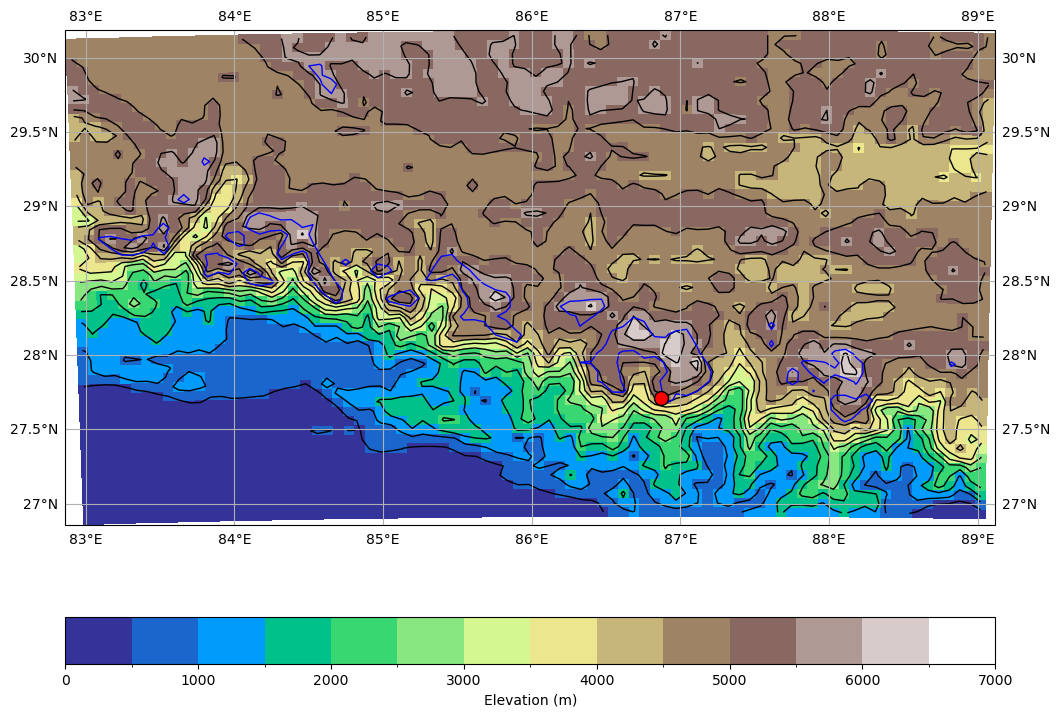

In [11]:
ice_level = 40 # Seuil à partir duquel on considère qu'on observe de la glace

clevs = np.arange(0, 7500, 500) # Echelle de couleur de topographie de 0 à 7500 tout les 500m d'alt
cmap = plt.get_cmap("terrain") # Palette de couleur pour les reliefs 
norm = mcolors.BoundaryNorm(boundaries=clevs, ncolors=cmap.N) # Attribut à chaque bande d'altitude une couleur de la palette "terrain"

#===================
# Plot de la figure
#===================

fig, ax = plt.subplots(figsize=(12,12),subplot_kw={'projection': ccrs.PlateCarree()}) # Utilisation de la projection plate carré

# Courbes de niveau (tous les 500m)
CS = ax.contour(ds_lon, ds_lat, ds_SH,
           levels=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000],
           colors="k", linewidths=1,
           transform=ccrs.PlateCarree())
#ax.clabel(CS, CS.levels, inline=True, fontsize=6, fmt="%d", inline_spacing=1) # Mettre le numéro sur les courbes

# Défini les lignes de contour des glaciers (bleu) où la grille dépasse la valeur de ice_level 
ax.contour(ds_lon, ds_lat, ds_ICE, 
           levels=[ice_level], 
           colors="b", linewidths=1,
           transform=ccrs.PlateCarree())

ax.gridlines(draw_labels=True) # Grille de lattitude et longitude

# Point rouge du Mera Peak avec coordonnées exactes
ax.plot(86.868662, 27.70984,
        marker='o', markersize=10,
        markeredgecolor='black', markerfacecolor='red',
        transform=ccrs.PlateCarree())

# Topographie
im = ax.pcolormesh(ds_lon, ds_lat, ds_SH,
                   cmap=cmap, norm=norm,
                   transform=ccrs.PlateCarree(),
                   shading="auto")

plt.colorbar(im, orientation="horizontal", pad=0.1, label="Elevation (m)") # Paramètres de la barre d'altitude (disposition vertical / taille / légende)
plt.show()

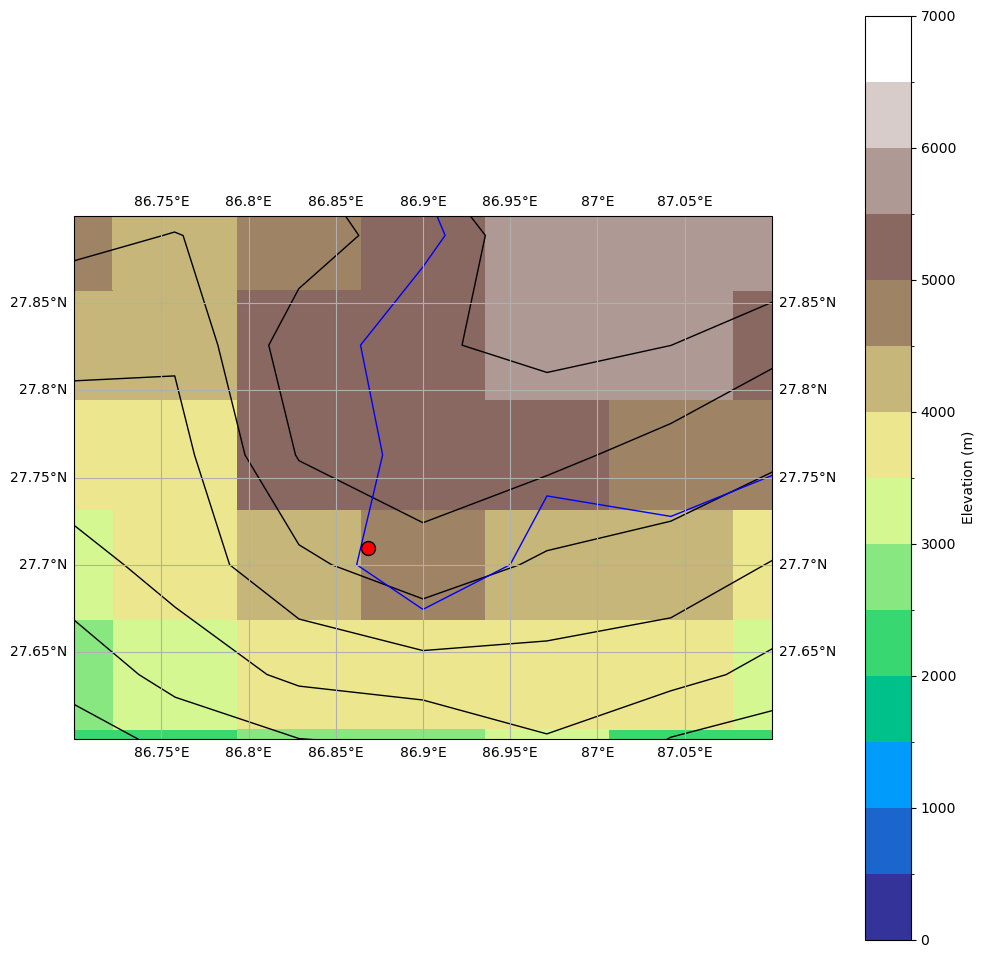

In [12]:
ice_level = 40 # Seuil à partir duquel on considère qu'on observe de la glace

clevs = np.arange(0, 7500, 500) # Echelle de couleur de topographie de 0 à 7500 tout les 500m d'alt
cmap = plt.get_cmap("terrain") # Palette de couleur pour les reliefs 
norm = mcolors.BoundaryNorm(boundaries=clevs, ncolors=cmap.N) # Attribut à chaque bande d'altitude une couleur de la palette "terrain"

#===================
# Plot de la figure
#===================

fig, ax = plt.subplots(figsize=(12,12),subplot_kw={'projection': ccrs.PlateCarree()}) # Utilisation de la projection plate carré

# Courbes de niveau (tous les 500m)
CS = ax.contour(ds_lon, ds_lat, ds_SH,
           levels=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000],
           colors="k", linewidths=1,
           transform=ccrs.PlateCarree())
#ax.clabel(CS, CS.levels, inline=True, fontsize=6, fmt="%d", inline_spacing=1) # Mettre le numéro sur les courbes

# Défini les lignes de contour des glaciers (bleu) où la grille dépasse la valeur de ice_level 
ax.contour(ds_lon, ds_lat, ds_ICE, 
           levels=[ice_level], 
           colors="b", linewidths=1,
           transform=ccrs.PlateCarree())

#ax.set_extent([86.3, 87.4, 27.2, 28.2], crs=ccrs.PlateCarree()) # Défini les limites (lon, lat) du domaine observable 
ax.set_extent([86.7, 87.1, 27.6, 27.9], crs=ccrs.PlateCarree()) # Défini les limites (lon, lat) du domaine observable zoom

ax.gridlines(draw_labels=True) # Grille de lattitude et longitude

# Point rouge du Mera Peak avec coordonnées exactes
ax.plot(86.868662, 27.70984,
        marker='o', markersize=10,
        markeredgecolor='black', markerfacecolor='red',
        transform=ccrs.PlateCarree())

# Topographie
im = ax.pcolormesh(ds_lon, ds_lat, ds_SH,
                   cmap=cmap, norm=norm,
                   transform=ccrs.PlateCarree(),
                   shading="auto")

plt.colorbar(im, orientation="vertical", pad=0.1, label="Elevation (m)") # Paramètres de la barre d'altitude (disposition vertical / taille / légende)
plt.show()

In [13]:
#ds_grM.TT.attrs # Donne les attributs de la variable regardée

In [14]:
"""# isel() selectionne l'index dans un tableau --> level=0 sélectionne le niveau vertical 0 --> time=0 est le premier temps du fichier
ds_TT_surf = ds_grM.TT.isel(time=0, level=0)[k:-k, k:-k] - 273.15 # Correction longitude latitude sur la variable
print(ds_TT_surf.shape)
print(ds_lon.shape)
print(ds_lat.shape)"""

"# isel() selectionne l'index dans un tableau --> level=0 sélectionne le niveau vertical 0 --> time=0 est le premier temps du fichier\nds_TT_surf = ds_grM.TT.isel(time=0, level=0)[k:-k, k:-k] - 273.15 # Correction longitude latitude sur la variable\nprint(ds_TT_surf.shape)\nprint(ds_lon.shape)\nprint(ds_lat.shape)"

In [15]:
"""fig, ax = plt.subplots(figsize=(10,10),
                       subplot_kw={'projection': ccrs.PlateCarree()})

im = ax.pcolormesh(ds_lon, 
                   ds_lat, 
                   ds_TT_surf, 
                   cmap="coolwarm", 
                   shading="auto",
                   transform=ccrs.PlateCarree())

ax.gridlines(draw_labels=True)

plt.colorbar(im, orientation="horizontal", pad=0.05, label="Temperature (°)")
plt.show()"""

'fig, ax = plt.subplots(figsize=(10,10),\n                       subplot_kw={\'projection\': ccrs.PlateCarree()})\n\nim = ax.pcolormesh(ds_lon, \n                   ds_lat, \n                   ds_TT_surf, \n                   cmap="coolwarm", \n                   shading="auto",\n                   transform=ccrs.PlateCarree())\n\nax.gridlines(draw_labels=True)\n\nplt.colorbar(im, orientation="horizontal", pad=0.05, label="Temperature (°)")\nplt.show()'

### Identification des indices X et Y de la grille qui correspond au glacier Mera 
#### (le point de grille le plus proche des coordonnées réelles)


In [16]:
#--> On vient récupérer les indices de la grille pour afficher des variables uniquement sur cette grille

merap_lat = 27.70984
merap_lon = 86.868662

dist = np.sqrt((ds_lat - merap_lat)**2 + (ds_lon - merap_lon)**2) # Calcul des distances entre les points de grille et coordonnées données
 
# index 1D du minimum
idx_1d = dist.argmin().item() # Recherche de la distance minimale avec argmin

# conversion en indices 2D (Y, X) 
iY, iX = np.unravel_index(idx_1d, dist.shape)

print("Indice Y :", iY)
print("Indice X :", iX)
print("Latitude trouvée :", ds_lat[iY, iX].item())
print("Longitude trouvée :", ds_lon[iY, iX].item())

Indice Y : 12
Indice X : 55
Latitude trouvée : 27.69999885559082
Longitude trouvée : 86.89999389648438


In [17]:
"""print(ds_TT_surf.dims)
print(ds_grM.TT.dims)
print(ds_grM.TT.time.values[:100])

plt.figure(figsize=(10,5))
ds_TT = ds_grM.TT.isel(y=iY, x=iX) - 273.15 
ds_TT.plot()

plt.title("TTZ – Mera grid")
plt.ylabel("TTZ (°C)")
plt.show()"""

'print(ds_TT_surf.dims)\nprint(ds_grM.TT.dims)\nprint(ds_grM.TT.time.values[:100])\n\nplt.figure(figsize=(10,5))\nds_TT = ds_grM.TT.isel(y=iY, x=iX) - 273.15 \nds_TT.plot()\n\nplt.title("TTZ – Mera grid")\nplt.ylabel("TTZ (°C)")\nplt.show()'

## Plot de la Temperature de surface de la grille correspondant au glacier Mera

In [18]:
variable = 'TTZ'
sourceData_var = '/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/daily/' # Chemin vers les fichiers contenant les données
file = variable+'_day_MARv3.14_ER5_spin2_GRq_1980-2024.nc' # Fichier de données sur la période 1980-2024 pour la 'variable' associée

ds_TTZ = xr.open_dataset(sourceData_var+file) 
ds_TTZ_surf = ds_TTZ.isel(ZTQLEV=0).TTZ.load() # ZTQLEV indique le niveau observé (ici 0=surface ?)

ds_TTZ_surf = ds_TTZ_surf[:,k:-k,k:-k] # Correction des effets de bord (k pixel)

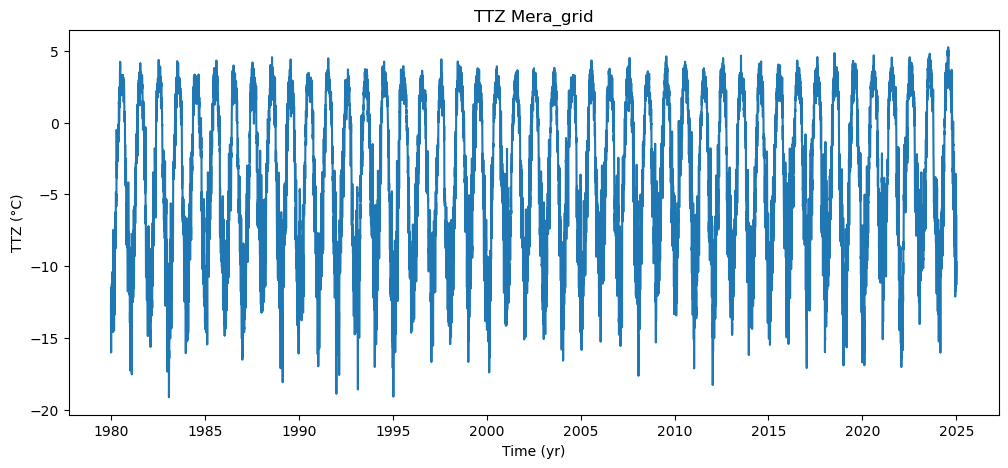

In [19]:
# Plot de la temperature de surface (ZTQLEV=0) du point de grille du Mera glacier
plt.figure(figsize=(12,5))

ds_TTZ_surf.isel(Y=iY, X=iX).plot() # Affiche la temperature pour la grille à l'index iY,iX

plt.title("TTZ Mera_grid")
plt.ylabel("TTZ (°C)")
plt.xlabel("Time (yr)")
plt.show()

In [20]:
# isel() selectionne l'index dans un tableau --> level=0 sélectionne le niveau vertical 0 --> time=0 est le premier temps du fichier
# Faire .TTZ.isel() permet de passer de xarray.Dataset en xarray.DataArray --> On ne sélectionne qu'une variable qu'on peut afficher avec pcolormesh après
ds_TTZ_map = ds_TTZ.TTZ.isel(TIME=0, ZTQLEV=0)[k:-k, k:-k] # Correction longitude latitude sur la variable

print(len(ds_TTZ.TIME))
print(ds_TTZ_map.shape)
print(ds_lon.shape)
print(ds_lat.shape)

16437
(52, 86)
(52, 86)
(52, 86)


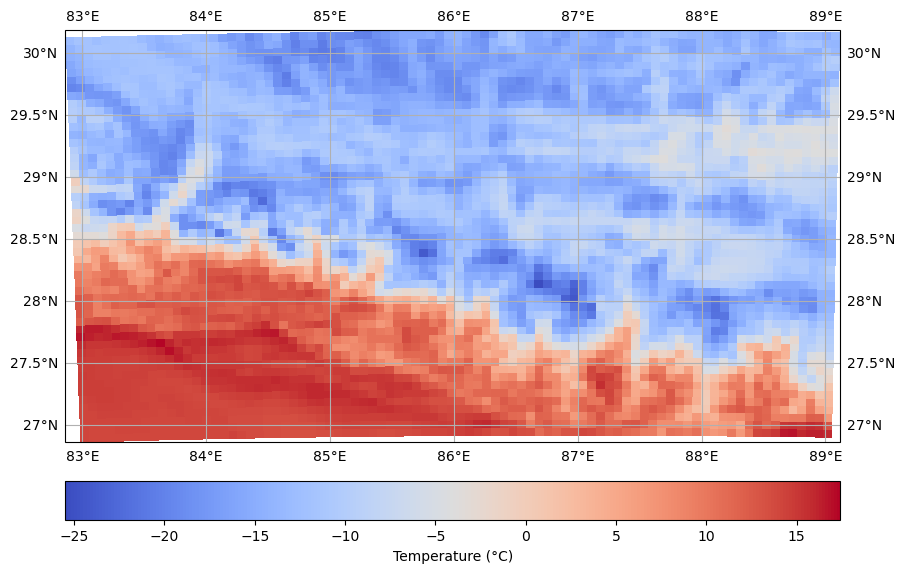

In [21]:
fig, ax = plt.subplots(figsize=(10,10),
                       subplot_kw={'projection': ccrs.PlateCarree()})

im = ax.pcolormesh(ds_lon, 
                   ds_lat, 
                   ds_TTZ_map, 
                   cmap="coolwarm", 
                   shading="auto",
                   transform=ccrs.PlateCarree())

ax.gridlines(draw_labels=True)

plt.colorbar(im, orientation="horizontal", pad=0.05, label="Temperature (°C)")
plt.show()

## Plot du SMB de la grille correspondant au glacier Mera

In [22]:
variable = 'SMB'
sourceData_var = '/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/daily/' 
file = variable+'_day_MARv3.14_ER5_spin2_GRq_1980-2024.nc'

ds_SMB = xr.open_dataset(sourceData_var+file).SMB.isel(SECTOR=0).load() # SECTOR ?
ds_SMB = ds_SMB[:,k:-k,k:-k]

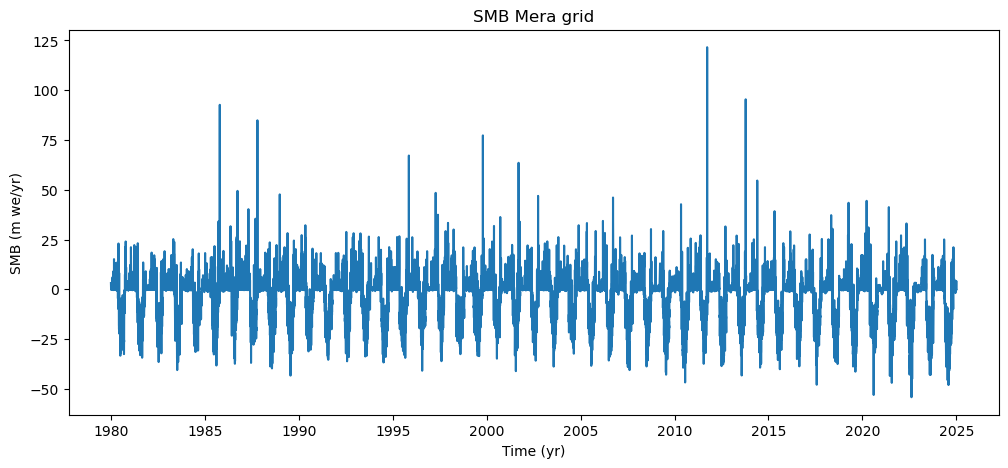

In [23]:
# Plot du SMB du point de grille du Mera glacier
plt.figure(figsize=(12,5))

ds_SMB.isel(Y=iY, X=iX).plot() 

plt.title("SMB Mera grid")
plt.ylabel("SMB (m we/yr)")
plt.xlabel("Time (yr)")
plt.show()

In [24]:
SMB_day = ds_SMB.isel(TIME=100, Y=iY, X=iX) # Valeur du SMB au 100 jour de la série (10/04/1980)

print(SMB_day.values)
print(ds_SMB.TIME[100].values)

3.0039062
1980-04-10T12:00:00.000000000


In [83]:
variable = 'SMB'
sourceData_var = '/bettik/PROJECTS/pr-regional-climate/santolam/MARout_post/GRq/spin2/work/daily/' 
file = variable+'_daysum_MARv3.14_ER5_spin2_GRq_2010.nc'

ds_SMB = xr.open_dataset(sourceData_var+file).SMB.isel(SECTOR=0).load() # SECTOR ?
ds_SMB = ds_SMB[:,k:-k,k:-k]

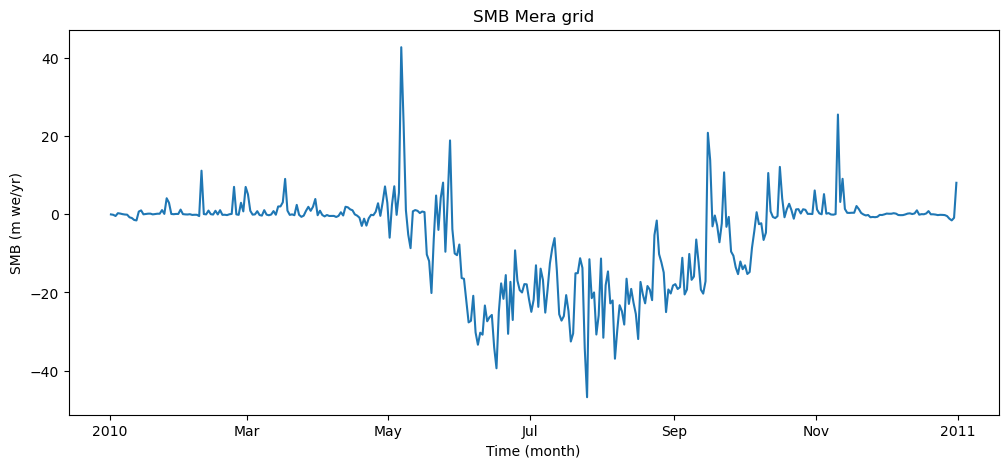

In [84]:
# Plot du SMB du point de grille du Mera glacier
plt.figure(figsize=(12,5))

ds_SMB.isel(Y=iY, X=iX).plot() 

plt.title("SMB Mera grid")
plt.ylabel("SMB (m we/yr)")
plt.xlabel("Time (month)")
plt.show()

In [92]:
# Ouverture fichier xlsx Glacioclim et récupération date de l'observation
df = pd.read_excel('/home/turpinli/Mera_SMB/AnnualMB_Mera_09_10.xlsx', header=1) #pandas permet ici de lire les fichiers .xlsx et prenant les colonnes à partir de la 2ème ligne
date_obs = df["Date_end"].iloc[4].replace(hour=12, minute=0, second=0) # Récupère la date de la mesure SMB
date_obs = date_obs.strftime("%Y-%m-%dT%H:%M:%S") # Formate l'écriture de la date au format MAR
print('Date_OBS:', date_obs)

Date_OBS: 2010-11-09T12:00:00


In [93]:
# Valeur du SMB dans MAR grâce à la date exact de Glacioclim
SMB_day = ds_SMB.sel(TIME=date_obs).isel(Y=iY, X=iX) # Récupère la valeur du SMB à la date de l'observation
print('SMB_MAR =', SMB_day.values)
print('Date_MAR:', ds_SMB.sel(TIME=date_obs).TIME.values) # Affiche la date dans le fichier

SMB_MAR = 0.041015625
Date_MAR: 2010-11-09T12:00:00.000000000
